In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

#importing data
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/data/players%20(1).csv"
players<-read_csv(url)
players

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [2]:
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/data/sessions.csv"
sessions<-read_csv(url)
sessions <- sessions |>
                            separate( col = start_time, into = c("start_date", "start_time"), sep = " ") |>
                            separate( col = end_time, into = c("end_date", "end_time"), sep = " ") |>
                            mutate(start_date = as.Date(start_date, format = "%d/%m/%Y")) |>
                      
mutate(end_date = as.Date(end_date, format = "%d/%m/%Y")) #Making data tidy and putting date columns into date variable type
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25,06:15,2024-07-25,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20,02:26,2024-05-20,02:45,1.71617e+12,1.71617e+12


In [3]:
#explore dataset to see subscribe conditions
players |>
  distinct(subscribe)
#to change subscribe condition to factors
players <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Y" = "TRUE", "N" = "FALSE"))
glimpse(players)
players


subscribe
<lgl>
TRUE
FALSE


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <fct> Y, Y, N, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, Y, N, Y, Y, Y, …
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Y,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Y,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,N,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,N,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,N,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,Y,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
#explore dataset proportion
num_obs <-nrow(players)
players|>
  group_by(subscribe) |>
  summarize(count= n(),
    percentage = n() / num_obs * 100)

subscribe,count,percentage
<fct>,<int>,<dbl>
N,52,26.53061
Y,144,73.46939


played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,Y
3.8,17,Y
0.0,17,N
⋮,⋮,⋮
0.0,17,N
2.3,17,N
0.2,NA,Y


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <fct> Y, Y, N, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, Y, N, Y, Y, Y, …
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


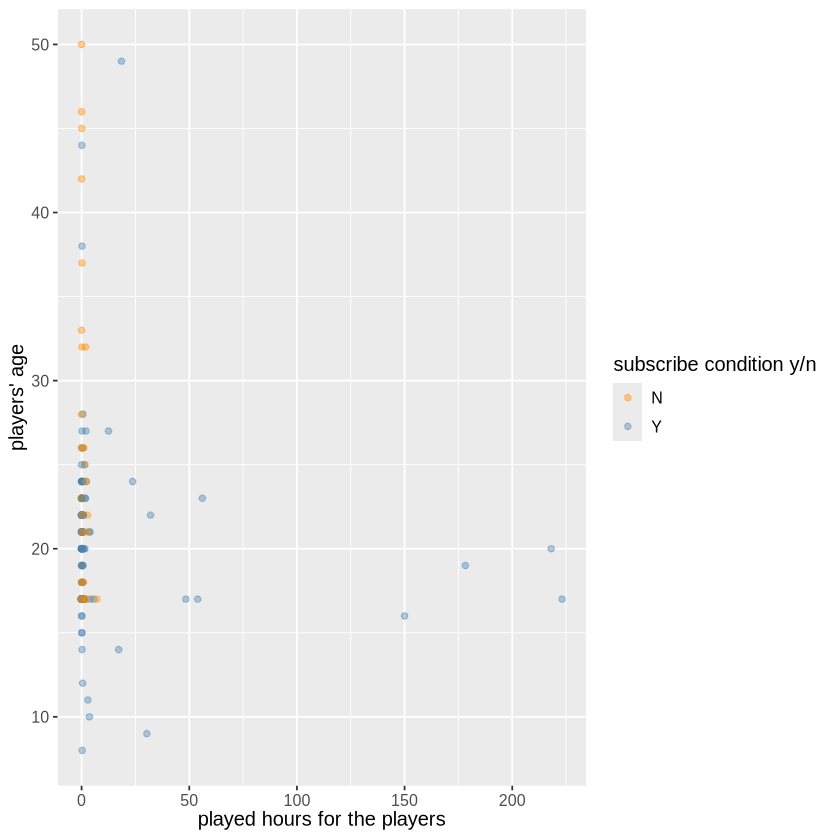

In [5]:
#to extra column we wanted
players_train<-players|>
select(played_hours,Age,subscribe)
players_train
glimpse(players)
hours_age<-players|>ggplot(aes(x=played_hours,y=Age,color=subscribe))+
geom_point(alpha=0.4)+
labs(x="played hours for the players", y="players' age", color="subscribe condition y/n")+
scale_color_manual(values=c("darkorange","steelblue"))+
theme(text=element_text(size=12))
hours_age



In [6]:
#to extra column we wanted
players_train<-players|>
select(played_hours,Age,subscribe)|>filter(!is.na(Age))
players_train

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,Y
3.8,17,Y
0.0,17,N
⋮,⋮,⋮
0.3,22,N
0.0,17,N
2.3,17,N


In [7]:
#to set seed for reproducibility
set.seed(520)

In [8]:
#create the train/test split
split<-initial_split(players_train,prop=0.75,strata=subscribe)
train_set<-training(split)
test_set<-testing(split)
#review the training/testing set
glimpse(train_set)
glimpse(test_set)

Rows: 145
Columns: 3
$ played_hours <dbl> 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 1.4, 0.0, 0.0, 0.9, 0.1, 0.…
$ Age          <dbl> 17, 21, 22, 17, 23, 18, 25, 24, 23, 18, 22, 37, 28, 21, 1…
$ subscribe    <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, …
Rows: 49
Columns: 3
$ played_hours <dbl> 0.0, 0.0, 0.0, 0.5, 0.1, 0.0, 0.0, 5.6, 0.3, 0.4, 0.6, 0.…
$ Age          <dbl> 17, 17, 17, 17, 23, 17, 33, 17, 24, 22, 21, 42, 11, 10, 1…
$ subscribe    <fct> Y, Y, Y, Y, Y, Y, N, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, Y, …


In [9]:
# recreate the standardization recipe
# (since it must be based on the training data)
players_recipe <- recipe(subscribe~played_hours +Age,
                        data =train_set) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [10]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train_set)

knn_fit#predictions
predictions<-predict(knn_fit,test_set)|>
bind_cols(test_set)

predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4068966
Best kernel: rectangular
Best k: 3

.pred_class,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
N,0,17,Y
N,0,17,Y
N,0,17,Y
⋮,⋮,⋮,⋮
N,0.0,17,Y
N,0.0,17,N
Y,2.3,17,N


In [11]:
#predictions
predictions<-predict(knn_fit,test_set)|>
bind_cols(test_set)

predictions

.pred_class,played_hours,Age,subscribe
<fct>,<dbl>,<dbl>,<fct>
N,0,17,Y
N,0,17,Y
N,0,17,Y
⋮,⋮,⋮,⋮
N,0.0,17,Y
N,0.0,17,N
Y,2.3,17,N


In [12]:
#accuracy
predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5306122


In [13]:
predictions |> pull(subscribe) |> levels()

[1] "N" "Y"

In [14]:
#set the “positive” class and confusion metrix
predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

confusion <- predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7826087


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5


          Truth
Prediction  N  Y
         N  8 18
         Y  5 18

In [15]:
#tuning k
#split into training and validation sets
players_split <- initial_split(players_train, prop = 0.75, strata =subscribe)
players_subtrain <- training(players_split)
players_validation <- testing(players_split)
glimpse(players_split)
glimpse(players_subtrain)

List of 4
 $ data  : tibble [194 × 3] (S3: tbl_df/tbl/data.frame)
  ..$ played_hours: num [1:194] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
  ..$ Age         : num [1:194] 9 17 17 21 21 17 19 21 17 22 ...
  ..$ subscribe   : Factor w/ 2 levels "N","Y": 2 2 1 2 2 2 2 1 2 2 ...
 $ in_id : int [1:145] 8 16 22 28 30 34 37 46 53 67 ...
 $ out_id: logi NA
 $ id    : tibble [1 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ id: chr "Resample1"
 - attr(*, "class")= chr [1:3] "initial_split" "mc_split" "rsplit"
Rows: 145
Columns: 3
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 1.4, 0.0, 0.9, 0.1, 0.2, 0.…
$ Age          <dbl> 21, 22, 17, 23, 18, 33, 25, 24, 18, 22, 37, 28, 23, 17, 1…
$ subscribe    <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, …


In [16]:
#to redo recipe based on new subset
train_recipe <- recipe(subscribe  ~ played_hours + Age,
                        data = players_subtrain) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
train_recipe
#knn model
knn_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)
#predictions on validation data to see
validation_predictions<-predict(knn_fit,players_validation)|>
bind_cols(players_validation)
# compute the accuracy
acc <- validation_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()
acc



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



[1] 0.5510204

In [21]:
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                                  neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

knn_wf <- workflow() |>
add_recipe(players_recipe) |>
add_model(knn_spec_tune)

players_folds <- vfold_cv(train_set, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- knn_wf |>
tune_grid(resamples = players_folds,
         grid = k_vals,
         metrics = metric_set(accuracy))

knn_results<-knn_results |> collect_metrics()


accuracies <- knn_results |> filter(.metric == "accuracy")
accuracies


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5027422,5,0.03228225,Preprocessor1_Model01
2,accuracy,binary,0.5027422,5,0.03228225,Preprocessor1_Model02
3,accuracy,binary,0.5455665,5,0.03241514,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.7451888,5,0.01193642,Preprocessor1_Model18
19,accuracy,binary,0.7454351,5,0.01908163,Preprocessor1_Model19
20,accuracy,binary,0.7454351,5,0.01908163,Preprocessor1_Model20


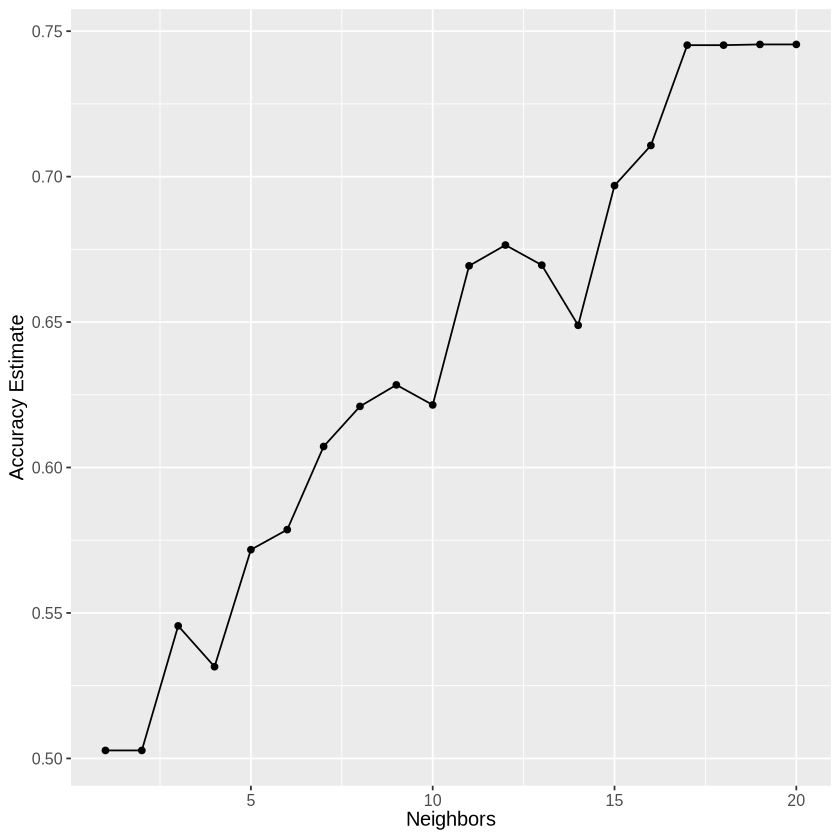

In [22]:


accuracy_vs_k<- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [23]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 19

In [26]:
recipe <- recipe(subscribe ~ played_hours + Age, data =train_set) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
recipe
#knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
#  set_engine("kknn") |>
#  set_mode("classification")

#knn_fit <- workflow() |>
#  add_recipe(cancer_recipe) |>
#  add_model(knn_spec) |>
#  fit(data = cancer_train)

#knn_fit



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



# Exploratory Visualizations

#### We will perform a few exploratory visualizations to get a rough idea of whether a relationship exists between the variables:

In [18]:
url_1 <- "https://raw.githubusercontent.com/maxforman2025/Project-Individual/refs/heads/main/players.csv"

players_data <- read_csv(url_1)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


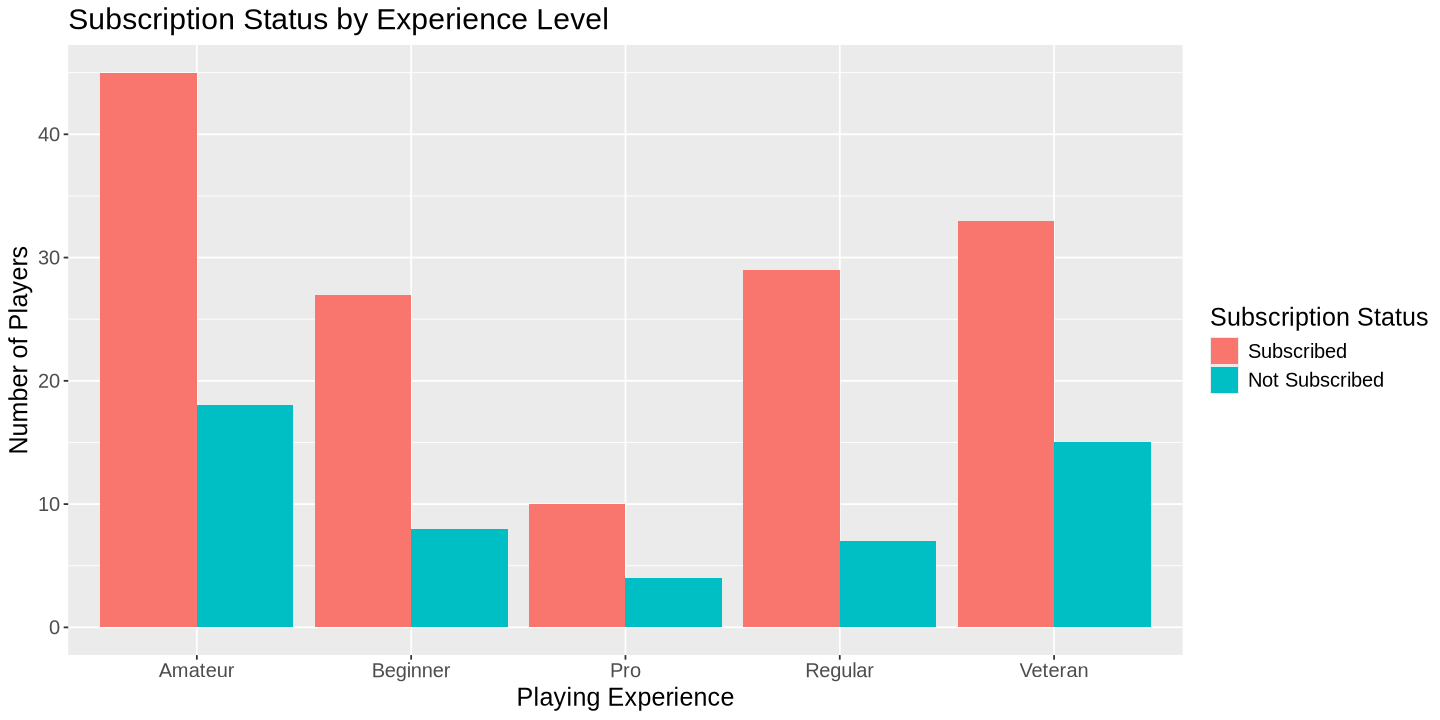

In [19]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 6) 
players_data$subscribe <- factor(players_data$subscribe, 
                                 levels = c(TRUE, FALSE), 
                                 labels = c("Subscribed", "Not Subscribed"))

experience <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Playing Experience", y = "Number of Players", fill = "Subscription Status", title = "Subscription Status by Experience Level") +
    theme(text = element_text(size = 15))
experience

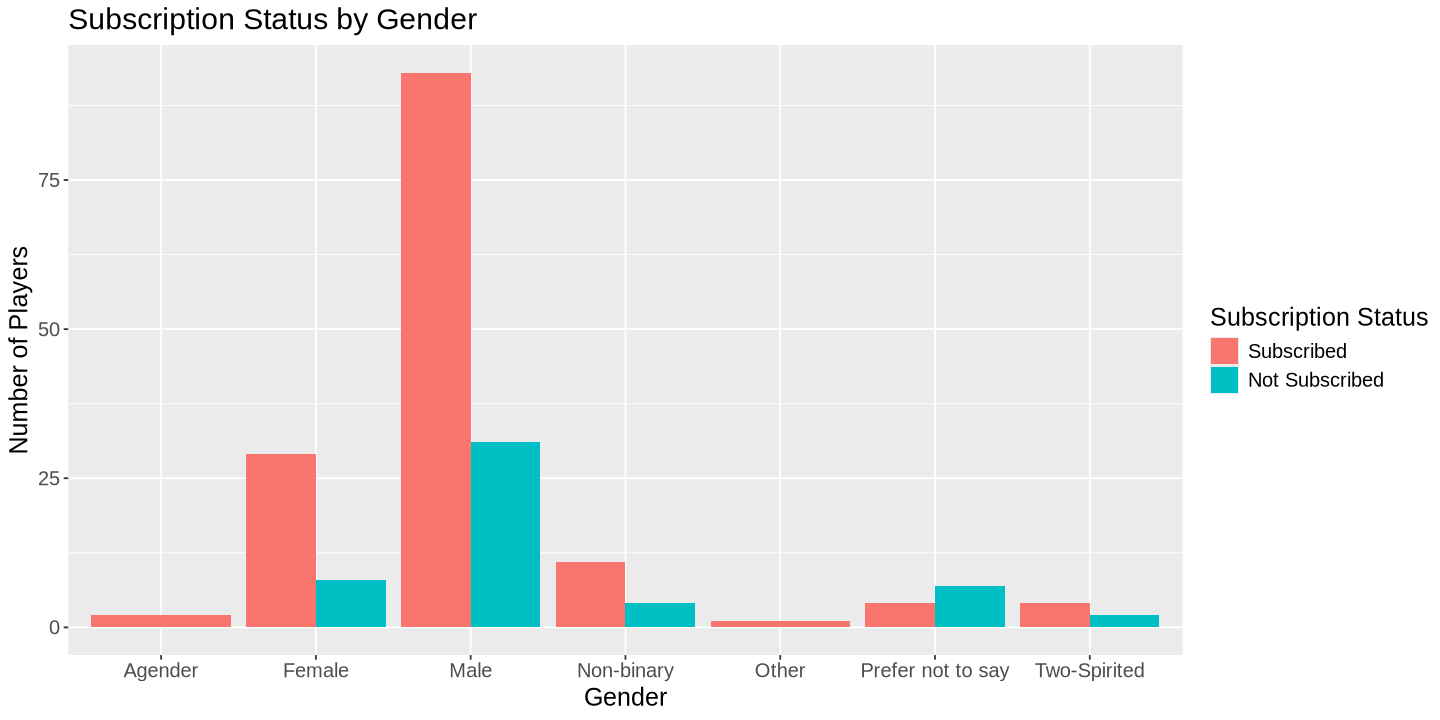

In [20]:
options(repr.plot.width = 12, repr.plot.height = 6) 
gender <- ggplot(players_data, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Gender", y = "Number of Players", fill = "Subscription Status", title = "Subscription Status by Gender") +
    theme(text = element_text(size = 15))
gender

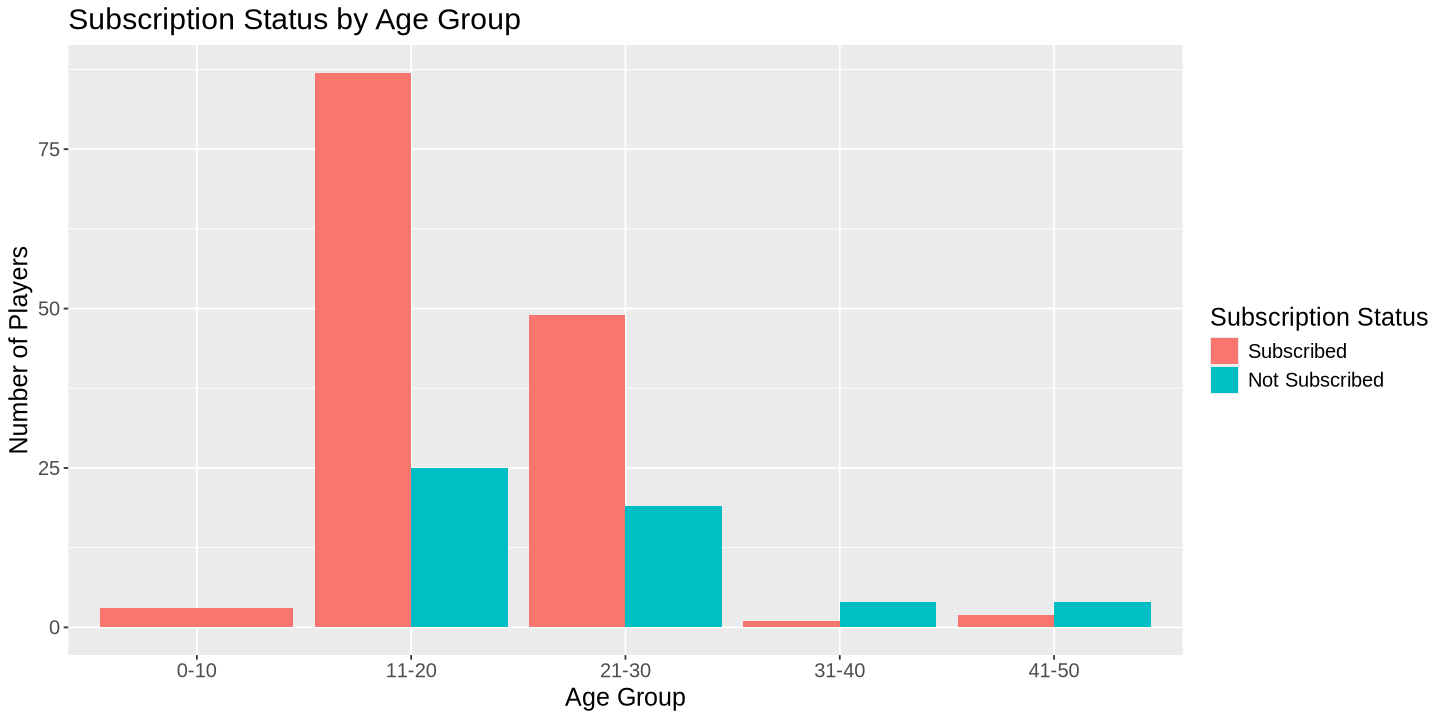

In [21]:
players_data <- players_data %>%
  mutate(Age_Group = cut(Age, 
                         breaks = c(0, 10, 20, 30, 40, 50, 100), 
                         labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51+"),
                         right = TRUE)) %>%
filter(!is.na (Age_Group))

age <- ggplot(players_data, aes(x = Age_Group, fill = as.factor(subscribe))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Age Group",
       x = "Age Group",
       y = "Number of Players",
       fill = "Subscription Status") +
    theme(text = element_text(size = 15))
age

# Dicsussion